<a href="https://colab.research.google.com/github/amithrx/Live-Pose-estimation-using-Google-Mediapipe-Various-ML-algorithms/blob/main/RandomForest(with_LDA_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving amit.csv to amit.csv


In [18]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
dataset = pd.read_csv('amit.csv')

# divide the dataset into class and target variable
# split dataset
X = dataset.iloc[:, 0:117]
y = dataset.iloc[:,117]
print(X)

      nose_x_1  l_shouldr_x_1  r_shoulder_x_1  l_elbow_x_1  r_elbow_x_1  \
0     0.466837       0.536425        0.421737     0.552586     0.400637   
1     0.466981       0.534423        0.419801     0.552579     0.398616   
2     0.443873       0.510529        0.392760     0.538785     0.373896   
3     0.464226       0.529767        0.413536     0.551292     0.381716   
4     0.465310       0.522171        0.403041     0.550459     0.370451   
...        ...            ...             ...          ...          ...   
3807  0.410130       0.470613        0.353162     0.481384     0.346614   
3808  0.413311       0.471635        0.354795     0.481460     0.343648   
3809  0.425184       0.478965        0.361634     0.487567     0.350380   
3810  0.424494       0.479368        0.360942     0.486463     0.352959   
3811  0.415483       0.472030        0.358733     0.484145     0.349483   

      l_wrist_x_1  r_wrist_x_1  l_hip_x_1  r_hip_x_1  l_knee_x_1  ...  \
0        0.554412     0.39

Accuracy test: 0.8794233289646134
Accuracy train: 0.8934076746474254


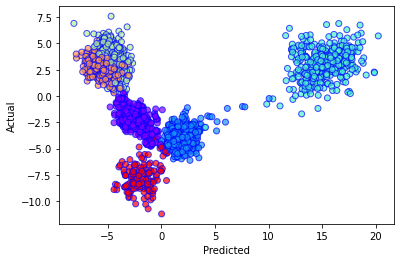

0.8794233289646134
[[0.1965924  0.         0.         0.         0.         0.        ]
 [0.         0.19134993 0.         0.         0.         0.        ]
 [0.         0.00131062 0.1559633  0.         0.         0.        ]
 [0.         0.         0.         0.08650066 0.04587156 0.        ]
 [0.         0.         0.         0.01965924 0.24901704 0.        ]
 [0.05242464 0.00131062 0.         0.         0.         0.        ]]


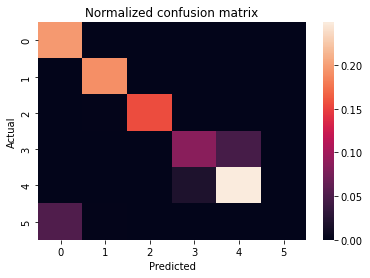

0.8794233289646134


In [22]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL

dataset = pd.read_csv('amit.csv')

# divide the dataset into class and target variable
# split dataset

X = dataset.iloc[:, 0:117]
y = dataset.iloc[:,117]

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
	X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)
# plt.title('Normalized confusion matrix')
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# print the accuracy and confusion matrix
print('Accuracy test: ' + str(accuracy_score(y_test, y_pred)))
print('Accuracy train: ' + str(accuracy_score(y_train, y_pred_train)))
# conf_m = confusion_matrix(y_test, y_pred,normalize='all')
# print(conf_m)
# import seaborn
# seaborn.heatmap(cm)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print(f1_score(y_test, y_pred,average='micro'))


# Evaluate Model
cm = confusion_matrix(y_test, y_pred, normalize='all')
print (cm)
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(cm)
# plt.show()
# Normalise
# cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.title('Normalized confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print(f1_score(y_test, y_pred,average='micro'))

